In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import Image
from IPython.core.display import HTML 

We are attempting to be able to use the Kasen SEDs in our two-component model of a kilonova. Kasen's SEDs come from simulations of mass in a spherical distribution, but we assume a conical distribution for Type 0, Shock Heated, Low Lanthanide, Blue Ejecta and a sphere-minus-cone distribution for the Type 1, Tidal, High Lanthanide, Red Ejecta. Something like the image below, but there are two cones, at both poles, instead of one. The symbols on the image are irrelevant, but the geometry is what we are considering. Except there are two "blue" sections in our model - one as well on the other pole.

In [7]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/e/e0/Kugel-sektor.png")

We think it is the density of the mass that determines the evolution of the SED - rather than just purely the mass. The SED is due to r-process nucleosynthesis, the reactions of whcih wil happen only in that extremely dense, extremely neutron rich environment. (Right?)

So, in order to use the Kasen SEDs, we find $M_{sph}$, the mass a sphere of the same density as the component in question would have. Jessica figured this out, and for Type 0 ejecta, it has the form

$$ \frac{M_{sph}}{M_{ej}} = \frac{1}{2} \big[ \sin^2 \psi \cos \psi + (1-\cos\psi)^2(2+\cos \psi) \big] $$

where $\psi$ is the half opening angle of the ejecta. 


For Type 1 ejecta, it has the form of 1 minus that expression. Consider the limiting cases: if the half opening angle of the Type 0 ejecta is 0, then the component is entirely Type 1 ejecta, and the entire sphere is red ejecta, so the multiplicative factor for Type 1 ejecta is 1. If the half-opening angle of the blue component is $\pi/2$, then there is NO red ejecta, and the multiplicative factor should be 0. 

Indeed, that is what we see when we plot the function:

Text(0,0.5,'Spherical mass equivalent/Mass')

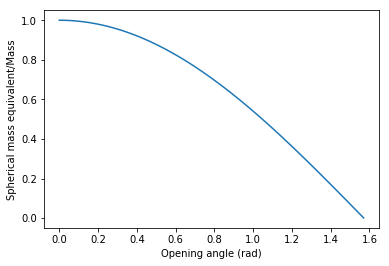

In [9]:
phi = np.linspace(0, 1.57, 100)
shock_mass_fraction =  1- ( 0.5 * ( (2+np.cos(phi) ) * ( 1 - np.cos(phi) )**2 + ( np.sin(phi)**2 ) * np.cos(phi) ) )

plt.plot(phi, shock_mass_fraction)
plt.xlabel("Opening angle (rad)")
plt.ylabel("Spherical mass equivalent/Mass")

Next, we consider the viewing angle weight. In our model, we assume that all that matters is the relative projected areas on a circle of the two components, since we only see a circle when we look at a sphere in the sky. The relative projected areas are dependent on both the opening angle of the Type 0 ejecta and the viewing angle. 

Consider the case where the viewing angle, $\theta$, is fixed to 30 degrees (0.52 rad). We vary the opening angle of the Type 0 ejecta from 0 to 90 and consider the weighing factor on the Type 1 ejecta. If the opening angle is 0, then all the ejecta is Type 1, and the weighing factor should just be 1. If the opening angle is 90, then all the ejecta is Type 0 and the weight on Type 1 should be 0. 

Indeed, we plot that below.

In [17]:
def weight(phi, theta):
        # viewing angle theta, half opening angle phi
        if phi + theta > np.pi/2.: 
            x = ( (np.sin(phi)**2. - np.cos(theta)**2.)**.5/
                np.sin(theta) )
        else:
            x = 0 

        weight0 = ( (np.pi*(np.sin(phi)**2.)*(np.cos(theta)) + 
            2*(1-np.cos(theta))*(np.arcsin(x) - x*(1 - x**2.)**.5))/np.pi )
        return weight0

Text(0,0.5,'Weight on Type 0 ejecta')

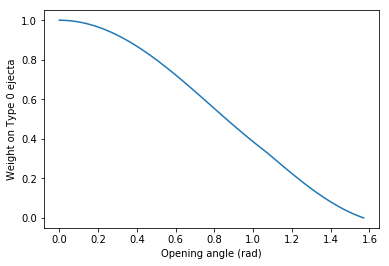

In [20]:
weights = np.array([weight(i, 0.52) for i in phi])
# We subtract 1 because weight(phi, theta) returns the weight for Type 0 ejecta
# and we are thinking about the Type 1 ejecta
plt.plot(phi,  1-weights)
plt.xlabel("Opening angle (rad)")
plt.ylabel("Weight on Type 0 ejecta")

Next, we consider the case where the half-opening angle is fixed to 30 degrees and we vary the viewing angle from 0 to 90. 0 corresponds to looking at the system "from the top down" or where the z-component of the angular momentum of the system is pointing at you, and 90 corresponds to the plane of the merger. So, in the case of $\theta$ = 0, the weight on Type 1 should be some fraction of the total area, and it should steadily go up as we approach the equatorial, since the Type 1 ejecta is situated around the equator. This is plotted below.

Text(0,0.5,'Weight on Type 0 ejecta')

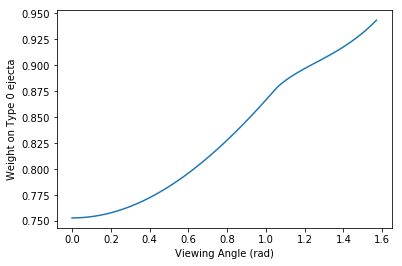

In [19]:
theta = np.linspace(0, 1.57, 100)
weights = np.array([weight(0.52, i) for i in theta])
# We subtract 1 because weight(phi, theta) returns the weight for Type 0 ejecta
# and we are thinking about the Type 1 ejecta
plt.plot(phi,  1-weights)
plt.xlabel("Viewing Angle (rad)")
plt.ylabel("Weight on Type 0 ejecta")